In [86]:
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
from fontTools.ttLib import TTFont
from PIL import Image, ImageDraw, ImageFont
from tensorflow.python.lib.io.file_io import FileIO

In [77]:
def get_existing_chars(filename):
    ttfont = TTFont(filename)
    return list({chr(key) for table in ttfont['cmap'].tables for key in table.cmap.keys()})

In [78]:
def get_image(font, char):
    img = Image.new('L', (500,500), 255)
    
    draw = ImageDraw.Draw(img)
    draw.text((0,0), char, font=font)
    
    npimg = 255 - np.array(img)
    wmin = npimg.sum(0).nonzero()[0].min()
    wmax = npimg.sum(0).nonzero()[0].max()
    hmin = npimg.sum(1).nonzero()[0].min()
    hmax = npimg.sum(1).nonzero()[0].max()
    npimg = 255 - npimg[hmin:hmax+1,wmin:wmax+1]
    return Image.fromarray(npimg)
    # return npimg

In [79]:
# utf-8
def get_all_korean():
    
    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()
    
    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns
    

In [80]:
ak = get_all_korean()

In [81]:
len(ak)

11172

In [82]:
fd = "data/r40202/ttfs/"
ttfs = [(fd+"twice/"+f,"twice", f.split(".ttf")[0]) for f in os.listdir(fd+"twice")]
ttfs += [(fd+"apple/"+f,"apple", f.split(".ttf")[0]) for f in os.listdir(fd+"apple")]
ttfs += [(fd+"uhbee/"+f,"uhbee", f.split(".ttf")[0]) for f in os.listdir(fd+"uhbee")]

In [83]:
ttfs[0]

('data/r40202/ttfs/twice/dahyun_4.ttf', 'twice', 'dahyun_4')

In [87]:
png_fd = "data/r40202/pngs/"

In [85]:
chardf = pd.DataFrame(ak)
chardf.to_parquet("data/r40202/all_korean.parquet")
pbar = tqdm(range(len(ttfs)))
c = 0
for i in pbar:
    ttf = ttfs[i]
    filename = ttf[0]
    font = ImageFont.truetype(filename,255)
    existing_chars = get_existing_chars(filename)
    for j in range(len(chardf)):
        char = chardf.iloc[j].values[0]
        if char in existing_chars:
            try:
                img = get_image(font, char)
                with open(png_fd+'%s__%s__%s.png'%(ttf[1],ttf[2],str(j)), "wb") as f:
                    img.save(f, "PNG")
            except:
                # print(ttf[1], ttf[2], char)
                c += 1
        else:
            c += 1
    pbar.set_postfix(passed=str(c), files=str(len(os.listdir(png_fd))))

100%|██████████| 173/173 [26:41<00:00,  9.26s/it, files=504343, passed=1428414]


In [88]:
files = [png_fd+f for f in os.listdir(png_fd) if ".png" in f]

In [89]:
import random

In [90]:
random.random()

0.9561860824335097

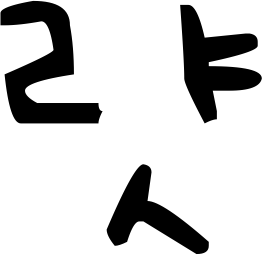

In [138]:
img = Image.open(files[int(random.random()*len(files))])
img

In [5]:
img

NameError: name 'img' is not defined

In [19]:
char

'힣'

In [4]:
for p in tqdm(os.listdir(png_fd)):
    try:
        os.remove(png_fd+p)
    except:
        pass

100%|██████████| 59187/59187 [00:01<00:00, 50247.78it/s]
